# `CASESTUDY ON REGRESSION

    The given dataset contains price of second-hand Hyundai grand i10 car with 
    respect to year of making. Find the best linear relationship between year and 
    price. Can you predict the possible price of a 2022 model second-hand grand i10?
    Please learn about lasso regression and create a model along with linear
    regression. Find out which one is performing better. 

#### importing libraries and loadin the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\meenu\Downloads\car_age_price (1).csv")
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


#### checking basic details of the dataset

In [3]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


<Axes: xlabel='Year', ylabel='Price'>

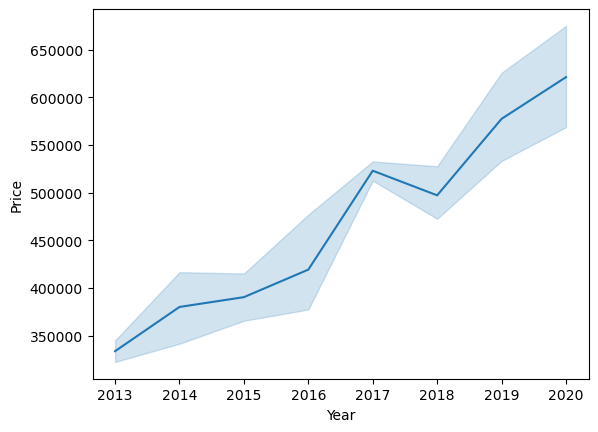

In [11]:
sns.lineplot(x='Year',y='Price',data=data)

#### Separating target and feature variables

In [5]:
X = data.drop(['Price'],axis=1)
y = data['Price']

In [6]:
X = np.array(X)
y = np.array(y)
print(X.shape,y.shape)

(112, 1) (112,)


In [7]:
y = y.reshape(-1,1)
print(y.shape)

(112, 1)


#### Scaling the data using standard scaler

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

#### creating train data and test data

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(89, 1) (23, 1) (89, 1) (23, 1)


## 1 Linear Regression

    model fitting

In [10]:
from sklearn.linear_model import LinearRegression
#importing model
model = LinearRegression()

#fitting the model
model1 = model.fit(X_train,y_train)

#predicting 
model1_pred = model1.predict(X_test)

    evaluating error and accuracy

In [12]:
from sklearn import metrics

#Evaluating the trained model on trainning data
y_prediction = model1.predict(X_train)
print("MAE on train data=", metrics.mean_absolute_error(y_train,y_prediction))

#Evaluating the trained model on the test data
y_prediction = model1.predict(X_test)
print("MAE on test data=", metrics.mean_absolute_error(y_test,y_prediction))

accuracy=model1.score(X_test,y_test)
print('ACCURACY=',accuracy)


MAE on train data= 0.4920523936734655
MAE on test data= 0.5895295935049284
ACCURACY= 0.3675931342589792


    making predictions

In [16]:
# Predict the price for a 2022 model
year_2022 = np.array([[2022]]) 
year_2022_scaled = scaler.transform(year_2022)

predicted_price_2022 = model1.predict(year_2022_scaled)
prediction_price=scaler.inverse_transform(predicted_price_2022)
print(f"Predicted price for a 2022 model: {prediction_price[0][0]}")

Predicted price for a 2022 model: 80005.58285915793


    Visualising the model's prediction

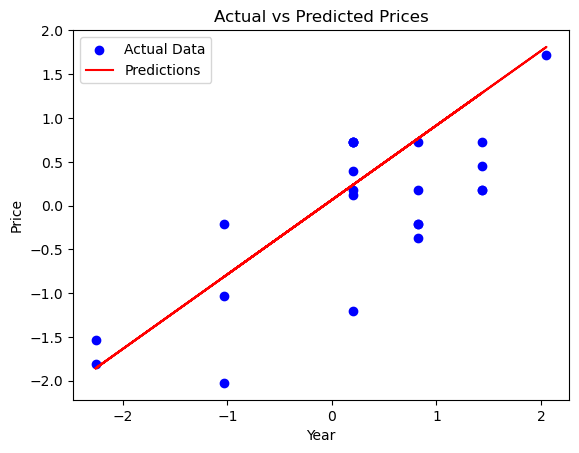

In [17]:
# Plotting the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plotting the predictions made by the model
plt.plot(X_test, model1_pred, color='red', label='Predictions')

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# 2 Lasso Regression

    model fitting

In [18]:
from sklearn.linear_model import Lasso

# Fit Lasso Regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)


Lasso()

    evalauting error and accuracy

In [19]:
from sklearn import metrics

# Evaluating the trained model on training data
y_train_predicted = lasso_model.predict(X_train)
print("MAE on train data:", metrics.mean_absolute_error(y_train, y_train_predicted))

# Evaluating the trained model on test data
y_test_predicted = lasso_model.predict(X_test)
print("MAE on test data:", metrics.mean_absolute_error(y_test, y_test_predicted))

# Checking accuracy scores
train_accuracy = lasso_model.score(X_train, y_train)
print("Training accuracy:", train_accuracy)

test_accuracy = lasso_model.score(X_test, y_test)
print("Test accuracy:", test_accuracy)


MAE on train data: 0.8121919290242855
MAE on test data: 0.7093301206881746
Training accuracy: 0.0
Test accuracy: -0.0023907377034251276


    making prediction

In [24]:
# Prepare input data for prediction for the year 2022
input_data_2022 = [[2022]] 

# Make predictions for 2022 using the trained Lasso model
predicted_price_lasso_2022 = lasso_model.predict(input_data_2022)
print("Predicted price for 2022 using Lasso Regression:", predicted_price_lasso_2022[0])


Predicted price for 2022 using Lasso Regression: 0.00914609747982985


    visulising the predictions

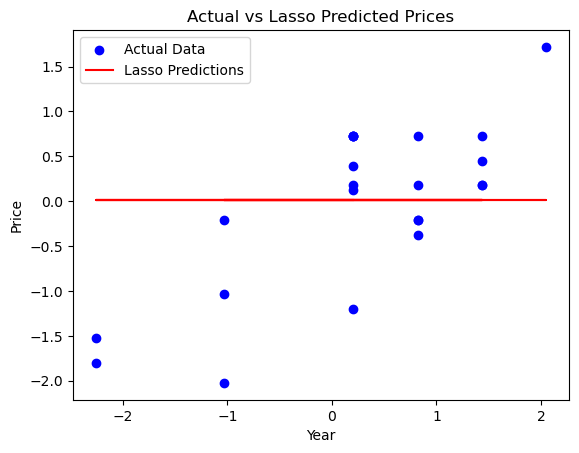

In [25]:
# Plotting the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plotting the predictions made by the Lasso model
plt.plot(X_test, y_test_predicted, color='red', label='Lasso Predictions')

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Actual vs Lasso Predicted Prices')
plt.legend()
plt.show()


## Conclusion

    From performing both linear regression and lasso regression on the given dataset and visualising their performances:
  The better option is : linear regression